In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

In [3]:
import pandas as pd

In [4]:
import numpy as np
from pathlib import Path

In [102]:
!ls  \Stock

all_stocks_5yr.csv  individual_stocks_5yr      __MACOSX  models
getSandP.py	    individual_stocks_5yr.zip  merge.sh


In [6]:
path = Path('/home/dani/course-v3/nbs/dl1/Stock/individual_stocks_5yr')

In [7]:
df = pd.read_csv(path/'AAPL_data.csv')

In [8]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [9]:
df=df['close']

In [10]:
df =(df.values).reshape(-1,1)
df = (normalize(df, axis=0)).squeeze()

In [11]:
df1 = pd.read_csv(path/'GOOGL_data.csv')

In [12]:
df1=df1['close']

In [13]:
df1 =(df1.values).reshape(-1,1)

In [14]:
df1 = (normalize(df1, axis=0)).squeeze()

In [15]:
df1.shape

(1259,)

In [16]:
df2 = pd.read_csv(path/'MSFT_data.csv')

In [17]:
df2=df2['close']

In [18]:
df2 =(df2.values).reshape(-1,1)
df2 = (normalize(df2, axis=0)).squeeze()

In [19]:
df3 = pd.read_csv(path/'AMZN_data.csv')

In [20]:
df3=df3['close']

In [21]:
df3 =(df3.values).reshape(-1,1)
df3 = (normalize(df3, axis=0)).squeeze()

In [22]:
df4 = pd.read_csv(path/'FB_data.csv')

In [23]:
df4=df4['close']

In [24]:
df4 =(df4.values).reshape(-1,1)
df4 = (normalize(df4, axis=0)).squeeze()

In [25]:
df4[0]

0.007593188857278845

In [26]:
wind=20 # Time Window
TimeS = np.empty([len(df)-wind-1, wind+1])
TimeS.shape
TimeS=np.float32(TimeS)
TimeS1=np.float32(np.empty([len(df)-wind-1, wind+1]))
TimeS2=np.float32(np.empty([len(df)-wind-1, wind+1]))
TimeS3=np.float32(np.empty([len(df)-wind-1, wind+1]))
TimeS4=np.float32(np.empty([len(df)-wind-1, wind+1]))
type(TimeS[0][0])

numpy.float32

In [27]:
for i in range(len(df)-wind-1):
    TimeS[i,:]=df[i:i+wind+1]

In [28]:
TimeS

array([[0.01688401, 0.01705998, 0.01663234, ..., 0.01530582, 0.01534625,
        0.01556487],
       [0.01705998, 0.01663234, 0.01660069, ..., 0.01534625, 0.01556487,
        0.0152293 ],
       [0.01663234, 0.01660069, 0.01658576, ..., 0.01556487, 0.0152293 ,
        0.01522647],
       ...,
       [0.04305467, 0.04354486, 0.04338312, ..., 0.04166123, 0.04174832,
        0.03993686],
       [0.04354486, 0.04338312, 0.04337814, ..., 0.04174832, 0.03993686,
        0.03893906],
       [0.04338312, 0.04337814, 0.04336819, ..., 0.03993686, 0.03893906,
        0.04056639]], dtype=float32)

In [29]:
TargetNump=TimeS[:,20]

In [30]:
TargetNump.shape

(1238,)

In [31]:
Y_Train=TargetNump[0:960]

In [32]:
Y_Test= TargetNump[960:]

In [33]:
Y_Test= Y_Test[0:256]

In [34]:
DataNump=TimeS[:,0:20]

In [35]:
for i in range(len(df)-wind-1):
    TimeS1[i,:]=df1[i:i+wind+1]

In [36]:
TimeS1=TimeS1[:,0:20]

In [37]:
TimeS1.shape

(1238, 20)

In [38]:
for i in range(len(df)-wind-1):
    TimeS2[i,:]=df2[i:i+wind+1]

In [39]:
TimeS2=TimeS2[:,0:20]

In [40]:
for i in range(len(df)-wind-1):
    TimeS3[i,:]=df3[i:i+wind+1]

In [41]:
TimeS3=TimeS3[:,0:20]

In [42]:
for i in range(len(df)-wind-1):
    TimeS4[i,:]=df4[i:i+wind+1]


In [43]:
TimeS4=TimeS4[:,0:20]

In [44]:
X_complete=np.stack((DataNump, TimeS1, TimeS2, TimeS3, TimeS4), axis=0)
X_complete.shape
TimeS4[0,:]

array([0.00759319, 0.00751738, 0.00728063, 0.00742361, 0.00758122,
       0.00753334, 0.0076956 , 0.00757111, 0.00725749, 0.00721679,
       0.00725403, 0.00728595, 0.00714763, 0.00724871, 0.00738969,
       0.00737373, 0.00732053, 0.00730258, 0.00760197, 0.00743757],
      dtype=float32)

In [45]:
X_complete=X_complete.transpose(2,1,0)

In [46]:
X_Train=X_complete[:,0:960,:]

In [47]:
X_Test=X_complete[:,960:,:]

In [48]:
np.shape(X_Test)

(20, 278, 5)

In [49]:
X_Test=X_Test[:,0:256,:]

In [50]:
np.shape(X_Test)

(20, 256, 5)

In [51]:
bs=64
numlay=2
hiddenSz=20

In [52]:
class Model1(nn.Module):
    
    def __init__(self):
        super(Model1, self).__init__()
        #self.rnn = nn.RNN(input_size=1,hidden_size=20, num_layers=1, batch_first = True)
        self.lstm = nn.LSTM(input_size=5,hidden_size=hiddenSz, num_layers=numlay, batch_first = True)
        self.out = nn.Linear(20,1)
        self.bn = nn.BatchNorm1d(20)
#     def forward(self,x, h_state):
#         r_out, h_state = self.rnn(x, h_state)
    def forward(self,x, h_state, c_state):
        r_out, (h_state,c_state) = self.lstm(x, (h_state,c_state))    
        r_out = self.bn(r_out)
        
        outs=[]
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
            
        
        return torch.stack(outs,dim=1), (h_state, c_state)

In [53]:
net=Model1()

In [54]:
net.cuda()

Model1(
  (lstm): LSTM(5, 20, num_layers=2, batch_first=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
  (bn): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [55]:
h_state = torch.zeros(numlay,bs,hiddenSz).cuda()
c_state = torch.zeros(numlay,bs,hiddenSz).cuda()

In [56]:
class StockDataset(Dataset):
    
    def __init__(self, X_dataset, Y_dataset):
        
        self.X_dataset = torch.from_numpy(X_dataset)
        self.Y_dataset = torch.from_numpy(Y_dataset)
        
    def __len__(self):
        return np.shape(self.Y_dataset)[0]

    def __getitem__(self, idx):
        
        sample = {'Sequence': self.X_dataset[:,idx,:], "Target": self.Y_dataset[idx]}
      

        return sample

In [57]:
Train_ds=StockDataset(X_Train, Y_Train)

In [58]:
Train_ds[0]

{'Sequence': tensor([[0.0169, 0.0157, 0.0146, 0.0115, 0.0076],
         [0.0171, 0.0156, 0.0148, 0.0113, 0.0075],
         [0.0166, 0.0156, 0.0148, 0.0114, 0.0073],
         [0.0166, 0.0156, 0.0149, 0.0118, 0.0074],
         [0.0166, 0.0157, 0.0149, 0.0118, 0.0076],
         [0.0164, 0.0158, 0.0148, 0.0116, 0.0075],
         [0.0164, 0.0161, 0.0149, 0.0118, 0.0077],
         [0.0160, 0.0158, 0.0148, 0.0117, 0.0076],
         [0.0159, 0.0159, 0.0146, 0.0117, 0.0073],
         [0.0160, 0.0159, 0.0147, 0.0116, 0.0072],
         [0.0157, 0.0158, 0.0145, 0.0114, 0.0073],
         [0.0160, 0.0158, 0.0145, 0.0114, 0.0073],
         [0.0158, 0.0159, 0.0147, 0.0116, 0.0071],
         [0.0157, 0.0160, 0.0147, 0.0116, 0.0072],
         [0.0153, 0.0161, 0.0148, 0.0117, 0.0074],
         [0.0149, 0.0164, 0.0149, 0.0120, 0.0074],
         [0.0153, 0.0167, 0.0150, 0.0121, 0.0073],
         [0.0151, 0.0166, 0.0149, 0.0120, 0.0073],
         [0.0153, 0.0166, 0.0149, 0.0120, 0.0076],
         [0.0153, 0

In [59]:
len(Train_ds)

960

In [60]:
for i in range(len(Train_ds)):
    sample = Train_ds[i]

    print(i, sample['Sequence'].size(), sample['Target'])

    if i == 3:
        break


0 torch.Size([20, 5]) tensor(0.0156)
1 torch.Size([20, 5]) tensor(0.0152)
2 torch.Size([20, 5]) tensor(0.0152)
3 torch.Size([20, 5]) tensor(0.0154)


In [61]:
Train_dl = DataLoader(Train_ds, batch_size=bs, shuffle=False, num_workers=4)

In [62]:
Train_dl.dataset[2]

{'Sequence': tensor([[0.0166, 0.0156, 0.0148, 0.0114, 0.0073],
         [0.0166, 0.0156, 0.0149, 0.0118, 0.0074],
         [0.0166, 0.0157, 0.0149, 0.0118, 0.0076],
         [0.0164, 0.0158, 0.0148, 0.0116, 0.0075],
         [0.0164, 0.0161, 0.0149, 0.0118, 0.0077],
         [0.0160, 0.0158, 0.0148, 0.0117, 0.0076],
         [0.0159, 0.0159, 0.0146, 0.0117, 0.0073],
         [0.0160, 0.0159, 0.0147, 0.0116, 0.0072],
         [0.0157, 0.0158, 0.0145, 0.0114, 0.0073],
         [0.0160, 0.0158, 0.0145, 0.0114, 0.0073],
         [0.0158, 0.0159, 0.0147, 0.0116, 0.0071],
         [0.0157, 0.0160, 0.0147, 0.0116, 0.0072],
         [0.0153, 0.0161, 0.0148, 0.0117, 0.0074],
         [0.0149, 0.0164, 0.0149, 0.0120, 0.0074],
         [0.0153, 0.0167, 0.0150, 0.0121, 0.0073],
         [0.0151, 0.0166, 0.0149, 0.0120, 0.0073],
         [0.0153, 0.0166, 0.0149, 0.0120, 0.0076],
         [0.0153, 0.0166, 0.0148, 0.0120, 0.0074],
         [0.0156, 0.0166, 0.0148, 0.0119, 0.0075],
         [0.0152, 0

In [63]:
import torch.optim as optim

In [82]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.00005)


In [83]:
for epoc in range (100):
        running_loss = 0.0
        predictionplot=np.empty([960])
        
        for i, data in enumerate(Train_dl):
        # get the inputs
            inputs, labels = data['Sequence'], data['Target']
            
            x = Variable(inputs).cuda()
            y = Variable(labels).cuda()
            
        # zero the parameter gradients
            optimizer.zero_grad()
            
        # forward + backward + optimize
            prediction, (h_state, c_state) = net(x, h_state,c_state)
            prediction=prediction[:,19,:].squeeze()
            h_state = Variable(h_state.data)
            c_state = Variable(c_state.data)
            loss = criterion(prediction, y)
            loss.backward()
            optimizer.step()
            
        # print statistics
            running_loss += loss.item()
            if i % 2 == 1:    # print every 2 mini-batches
                print('[%d, %1d] loss: %.7f' %(epoc + 1, i + 1, running_loss / 2))
                running_loss = 0.0
            
            predictionplot[i*64:i*64+64] = prediction.cpu().detach().numpy()

print('Finished Training')

[1, 2] loss: 0.0000044
[1, 4] loss: 0.0000096
[1, 6] loss: 0.0000054
[1, 8] loss: 0.0000047
[1, 10] loss: 0.0000158
[1, 12] loss: 0.0000039
[1, 14] loss: 0.0000009
[2, 2] loss: 0.0000005
[2, 4] loss: 0.0000032
[2, 6] loss: 0.0000069
[2, 8] loss: 0.0000034
[2, 10] loss: 0.0000045
[2, 12] loss: 0.0000025
[2, 14] loss: 0.0000011
[3, 2] loss: 0.0000046
[3, 4] loss: 0.0000022
[3, 6] loss: 0.0000100
[3, 8] loss: 0.0000070
[3, 10] loss: 0.0000013
[3, 12] loss: 0.0000014
[3, 14] loss: 0.0000019
[4, 2] loss: 0.0000091
[4, 4] loss: 0.0000017
[4, 6] loss: 0.0000097
[4, 8] loss: 0.0000089
[4, 10] loss: 0.0000006
[4, 12] loss: 0.0000010
[4, 14] loss: 0.0000019
[5, 2] loss: 0.0000115
[5, 4] loss: 0.0000018
[5, 6] loss: 0.0000082
[5, 8] loss: 0.0000089
[5, 10] loss: 0.0000005
[5, 12] loss: 0.0000010
[5, 14] loss: 0.0000016
[6, 2] loss: 0.0000120
[6, 4] loss: 0.0000019
[6, 6] loss: 0.0000070
[6, 8] loss: 0.0000082
[6, 10] loss: 0.0000006
[6, 12] loss: 0.0000011
[6, 14] loss: 0.0000013
[7, 2] loss: 0.0

[50, 2] loss: 0.0000026
[50, 4] loss: 0.0000014
[50, 6] loss: 0.0000047
[50, 8] loss: 0.0000030
[50, 10] loss: 0.0000033
[50, 12] loss: 0.0000016
[50, 14] loss: 0.0000007
[51, 2] loss: 0.0000026
[51, 4] loss: 0.0000014
[51, 6] loss: 0.0000047
[51, 8] loss: 0.0000030
[51, 10] loss: 0.0000033
[51, 12] loss: 0.0000016
[51, 14] loss: 0.0000007
[52, 2] loss: 0.0000026
[52, 4] loss: 0.0000014
[52, 6] loss: 0.0000047
[52, 8] loss: 0.0000029
[52, 10] loss: 0.0000034
[52, 12] loss: 0.0000016
[52, 14] loss: 0.0000007
[53, 2] loss: 0.0000025
[53, 4] loss: 0.0000014
[53, 6] loss: 0.0000047
[53, 8] loss: 0.0000029
[53, 10] loss: 0.0000034
[53, 12] loss: 0.0000016
[53, 14] loss: 0.0000007
[54, 2] loss: 0.0000025
[54, 4] loss: 0.0000014
[54, 6] loss: 0.0000046
[54, 8] loss: 0.0000029
[54, 10] loss: 0.0000034
[54, 12] loss: 0.0000017
[54, 14] loss: 0.0000007
[55, 2] loss: 0.0000025
[55, 4] loss: 0.0000014
[55, 6] loss: 0.0000046
[55, 8] loss: 0.0000029
[55, 10] loss: 0.0000035
[55, 12] loss: 0.0000017

[98, 2] loss: 0.0000020
[98, 4] loss: 0.0000015
[98, 6] loss: 0.0000045
[98, 8] loss: 0.0000026
[98, 10] loss: 0.0000042
[98, 12] loss: 0.0000018
[98, 14] loss: 0.0000007
[99, 2] loss: 0.0000020
[99, 4] loss: 0.0000015
[99, 6] loss: 0.0000045
[99, 8] loss: 0.0000026
[99, 10] loss: 0.0000043
[99, 12] loss: 0.0000018
[99, 14] loss: 0.0000007
[100, 2] loss: 0.0000020
[100, 4] loss: 0.0000015
[100, 6] loss: 0.0000045
[100, 8] loss: 0.0000027
[100, 10] loss: 0.0000043
[100, 12] loss: 0.0000018
[100, 14] loss: 0.0000007
Finished Training


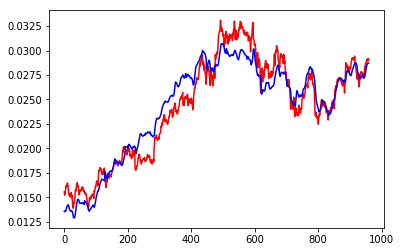

In [84]:
 # plotting
plt.plot(np.arange(0.0, 960, 1.0), Y_Train, 'r-')
#plt.draw(); plt.pause(0.05)
#plt.plot(np.arange(0.0, 64.0, 1.0), prediction.data.numpy().flatten(), 'b-')
plt.plot(np.arange(0.0, 960, 1.0), np.asarray(predictionplot), 'b-')
plt.draw(); plt.pause(0.05)

In [67]:
Test_ds=StockDataset(X_Test, Y_Test)

In [68]:
Test_ds[77]

{'Sequence': tensor([[0.0351, 0.0334, 0.0344, 0.0372, 0.0371],
         [0.0350, 0.0333, 0.0344, 0.0371, 0.0373],
         [0.0351, 0.0334, 0.0345, 0.0372, 0.0373],
         [0.0358, 0.0335, 0.0346, 0.0376, 0.0377],
         [0.0359, 0.0339, 0.0347, 0.0384, 0.0379],
         [0.0358, 0.0338, 0.0348, 0.0385, 0.0379],
         [0.0357, 0.0338, 0.0349, 0.0389, 0.0378],
         [0.0358, 0.0341, 0.0347, 0.0391, 0.0378],
         [0.0360, 0.0340, 0.0348, 0.0398, 0.0377],
         [0.0358, 0.0338, 0.0347, 0.0399, 0.0377],
         [0.0357, 0.0337, 0.0348, 0.0394, 0.0376],
         [0.0357, 0.0335, 0.0348, 0.0393, 0.0374],
         [0.0356, 0.0335, 0.0347, 0.0398, 0.0375],
         [0.0352, 0.0335, 0.0347, 0.0396, 0.0372],
         [0.0353, 0.0335, 0.0346, 0.0393, 0.0371],
         [0.0351, 0.0335, 0.0344, 0.0388, 0.0371],
         [0.0353, 0.0341, 0.0347, 0.0396, 0.0376],
         [0.0351, 0.0340, 0.0347, 0.0397, 0.0375],
         [0.0350, 0.0341, 0.0345, 0.0395, 0.0378],
         [0.0354, 0

In [69]:
Test_dl = DataLoader(Test_ds, batch_size=64, shuffle=False, num_workers=4)

In [85]:
with torch.no_grad():
    predictionplot=[]
    
    for data in Test_dl:
                
        inputs, labels = data['Sequence'].cuda(), data['Target'].cuda()
             
        # forward + backward + optimize
        
        prediction, (h_state,c_state) = net(inputs, h_state,c_state)    
        prediction=prediction[:,19,:].squeeze()
                        
        loss = criterion(prediction, labels)
        running_loss += loss.item()
               
        print('loss: %.7f' %(running_loss))
        running_loss = 0.0
        predictionplot[i*(len(prediction.cpu().numpy())):i*(len(prediction.cpu().numpy()))+len(prediction.cpu().numpy())] = prediction.cpu().detach().numpy()
       
        

        

loss: 0.0000015
loss: 0.0000017
loss: 0.0000007
loss: 0.0000017


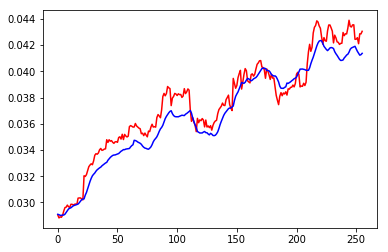

In [86]:
plt.plot(np.arange(0.0, 256, 1.0), Y_Test, 'r-')
plt.plot(np.arange(0.0, 256, 1.0), np.asarray(predictionplot), 'b-')
plt.draw(); 